# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- [Immanuel, Tacky]
- [20311931]
- [Section 1]
- [Favorite book]
- [January 6th, 2022]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [3]:
import datetime
import pandas as pd
import numpy as np

In [4]:
print(datetime.datetime.now())

2022-01-10 22:07:31.357661


In [5]:
!which python

/usr/local/bin/python


In [6]:
!python --version

Python 3.7.12


In [7]:
!echo $PYTHONPATH

/env/python


In [8]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [83]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
df1.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


Standardization

In [85]:
from sklearn.preprocessing import StandardScaler
df1_std = StandardScaler().fit_transform(df1)
df1_std = pd.DataFrame(data=df1_std, columns=df1.columns)

In [86]:
df1_std.info()
df1_std.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


#### KMeans Clustering

range(1, 9)
[KMeans(n_clusters=1, random_state=1), KMeans(n_clusters=2, random_state=1), KMeans(n_clusters=3, random_state=1), KMeans(n_clusters=4, random_state=1), KMeans(n_clusters=5, random_state=1), KMeans(n_clusters=6, random_state=1), KMeans(n_clusters=7, random_state=1), KMeans(random_state=1)]
Using the Elbow Method we can visually determine that 5 is the optimal Inertia Value


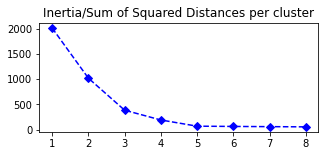

In [87]:
#We cumpute all 8 KMeans clusters and plot the inertia to see the optimal k value
Number_of_Clusters = range(1,9)
print(Number_of_Clusters)
sum_of_sq_distances = []
clusters = []


for k in Number_of_Clusters:
  KMclusters = KMeans(n_clusters=k,random_state=1).fit(df1_std)
  clusters.append(KMclusters)
  sum_of_sq_distances.append(KMclusters.inertia_)

print(clusters)  
  
plt.figure(figsize=(5, 2))
plt.title('Inertia/Sum of Squared Distances per cluster')
plt.plot(Number_of_Clusters, sum_of_sq_distances, 'bD--')

print('Using the Elbow Method we can visually determine that 5 is the optimal Inertia Value')


In [88]:
#Here we print the Silhouette score values for each k value
for i in range(1,8):
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",metrics.silhouette_score(df1_std, clusters[i].predict(df1_std)))

---------------------------------------
KMeans(n_clusters=2, random_state=1)
Silhouette score: 0.5212589967674505
---------------------------------------
KMeans(n_clusters=3, random_state=1)
Silhouette score: 0.6963481945884472
---------------------------------------
KMeans(n_clusters=4, random_state=1)
Silhouette score: 0.7581191889903789
---------------------------------------
KMeans(n_clusters=5, random_state=1)
Silhouette score: 0.8048976287755765
---------------------------------------
KMeans(n_clusters=6, random_state=1)
Silhouette score: 0.6331809452561232
---------------------------------------
KMeans(n_clusters=7, random_state=1)
Silhouette score: 0.48707550045073195
---------------------------------------
KMeans(random_state=1)
Silhouette score: 0.2978698496690983


We can visually determine again that 5 is the optimal K for Silhouette Scores


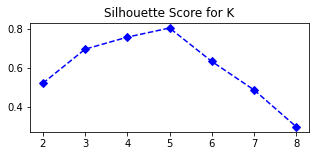

In [89]:
#Here we plot the Silhouette scores for each k value
sil_scores = []
for k in range(1,8):
  sil_scores.append(metrics.silhouette_score(df1_std, clusters[k].predict(df1_std)))

plt.figure(figsize=(5, 2))
plt.title('Silhouette Score for K')
plt.plot(range(2,9), sil_scores, 'bD--')
print('We can visually determine again that 5 is the optimal K for Silhouette Scores')

Silhouette Score for 3 Clusters: 0.8048976287755765


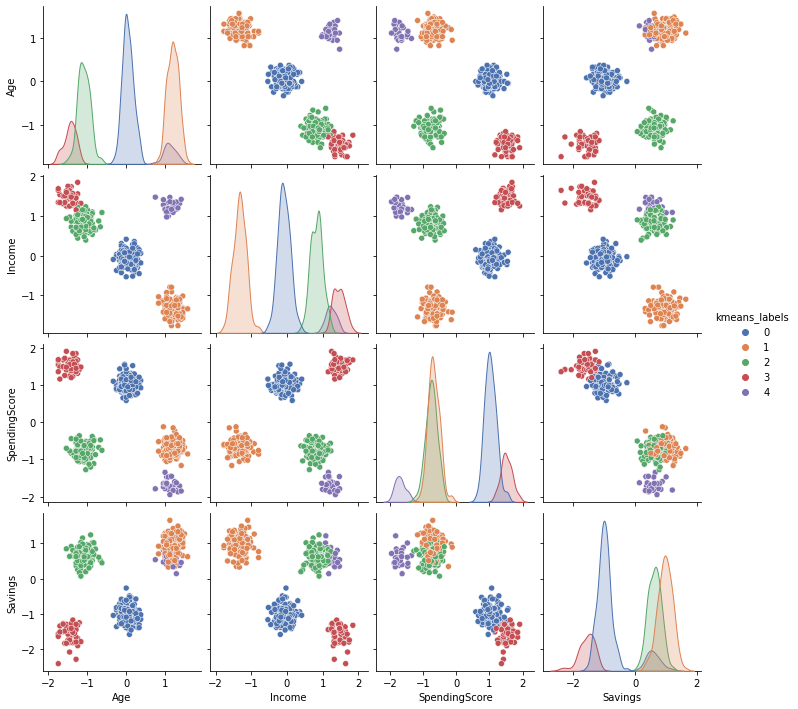

In [90]:
kmeans = KMeans(n_clusters=5,random_state=1).fit(df1_std)
labels = kmeans.labels_
df1_kmeans = df1_std.copy()
df1_kmeans['kmeans_labels'] = labels
print('Silhouette Score for 3 Clusters:',metrics.silhouette_score(df1_std, clusters[4].predict(df1_std)))
sns.pairplot(data=df1_kmeans, hue='kmeans_labels', palette = 'deep')

## 1.2: Clustering Algorithm #2

Agglomerative Clustering

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [92]:
sil_scores = []
clusters = []
for k in range(1,9):
  agg_clusters = AgglomerativeClustering(n_clusters=k, linkage='ward').fit_predict(df1_std)
  clusters.append(agg_clusters)
print('Silhouette Score for 5 Clusters:', metrics.silhouette_score(df1_std, clusters[4]))

Silhouette Score for 5 Clusters: 0.8048976287755765


range(1, 8)


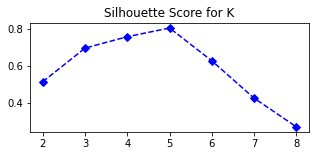

In [93]:
Number_of_Clusters = range(1,8)
print(Number_of_Clusters)

for k in range(1,8):
  sil_scores.append(metrics.silhouette_score(df1_std, clusters[k]))

plt.figure(figsize=(5, 2))
plt.title('Silhouette Score for K')
plt.plot(range(2,9), sil_scores, 'bD--')

Silhouette Score for 5 Clusters: 0.8048976287755765


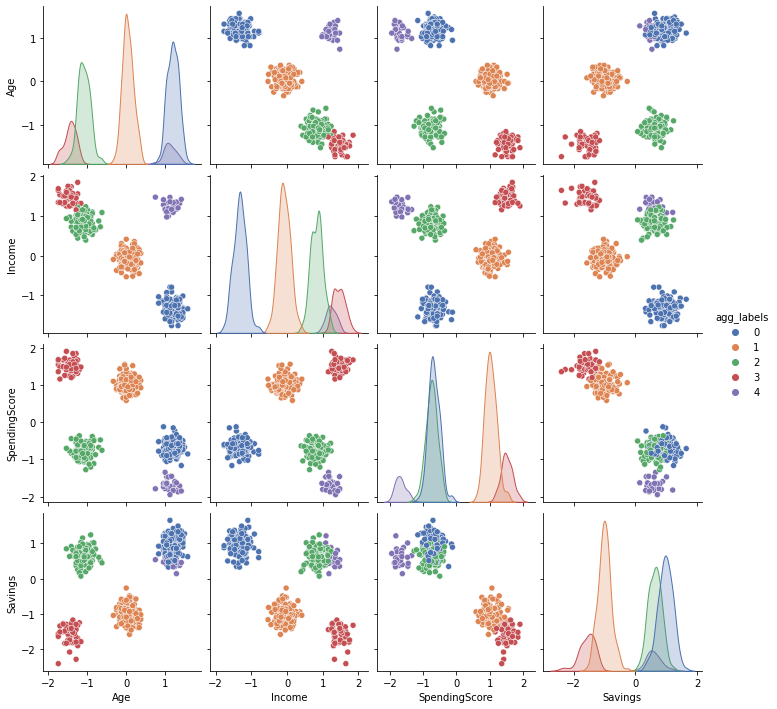

In [94]:
labels = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(df1_std).labels_
df1_agg = df1_std.copy()
df1_agg['agg_labels'] = labels
print('Silhouette Score for 5 Clusters:', metrics.silhouette_score(df1_std, clusters[4]))
sns.pairplot(data=df1_agg, hue='agg_labels', palette = 'deep')


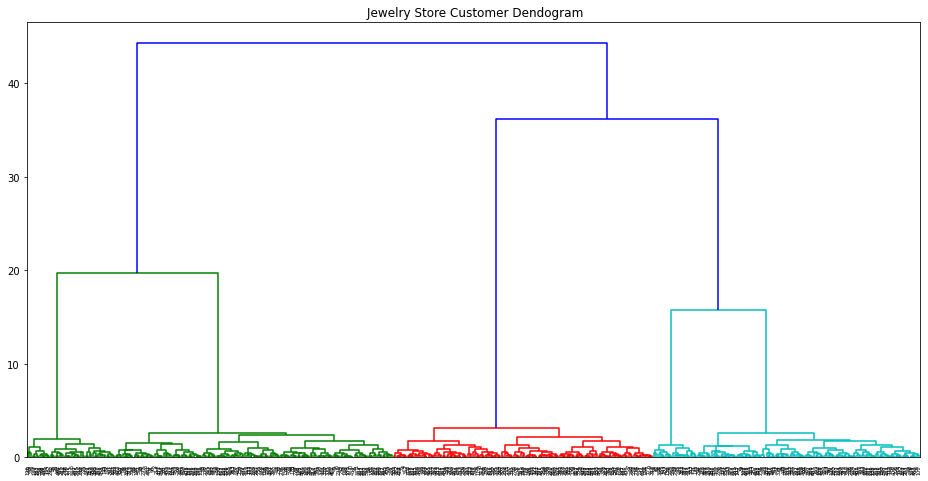

In [95]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage( df1_std, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title(" Jewelry Store Customer Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 

DBSCAN (Extra)

In [96]:
from sklearn.cluster import DBSCAN

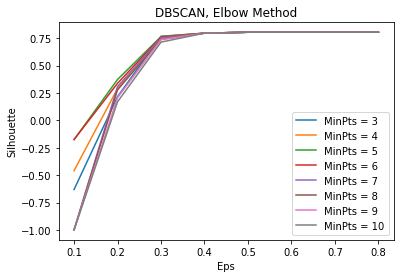

In [97]:
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(df1_std)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = metrics.silhouette_score(df1_std, db.labels_, metric='euclidean')
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();

In [98]:
sil_scores = []
m_samples = []
for k in range(1,9):
  db_clusters = DBSCAN(eps=0.5, min_samples=k).fit_predict(df1_std)
  m_samples.append(db_clusters)
print('Silhouette Score for 3 min_samples at eps=0.5', metrics.silhouette_score(df1_std, m_samples[2]))

Silhouette Score for 3 min_samples at eps=0.5 0.8048976287755765


range(1, 8)


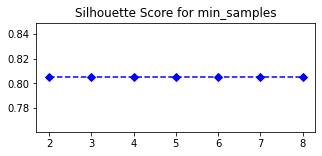

In [99]:
Number_of_Clusters = range(1,8)
print(Number_of_Clusters)

for k in range(1,8):
  sil_scores.append(metrics.silhouette_score(df1_std, m_samples[k]))

plt.figure(figsize=(5, 2))
plt.title('Silhouette Score for min_samples')
plt.plot(range(2,9), sil_scores, 'bD--')

Silhouette Score for 5 Clusters: 0.8048976287755765


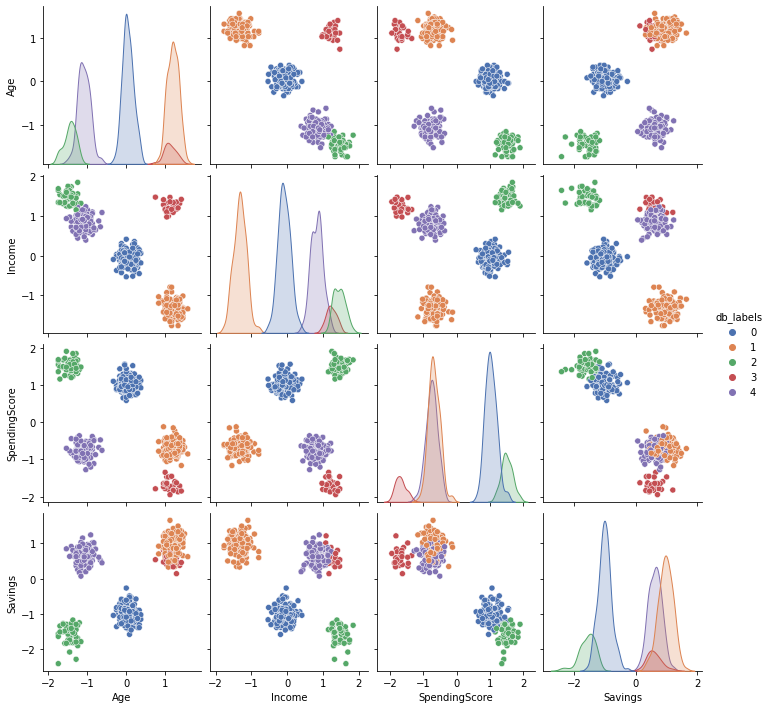

In [100]:
labels =  DBSCAN(eps=0.5, min_samples=3).fit(df1_std).labels_
df1_db = df1_std.copy()
df1_db['db_labels'] = labels
print('Silhouette Score for 5 Clusters:', metrics.silhouette_score(df1_std, m_samples[3]))
sns.pairplot(data=df1_db, hue='db_labels', palette = 'deep')


## 1.3 Model Comparison

Out of the 2 Algorithms chosen, plus the extra alagorithm used for practice, all the algorithms perform relatively the same in this particular case. However, DBScan appears to be much slower than the first two algorithms. Along with it's additional parameters which make it harder to tune and interprit than the others, we will eliminate it from consideration in this case. 

In regard to KMeans and Agglomerative Clustering, they both appear to perform relatively similar in speed. I would give the edge to Agglomerative Clustering simply because of the hierarchical visualization of all the possible clusters. It can provide needed flexibility when wanting to have a better understanding of how many clusters one should create. It is a fantastic way to compare one set of k clusters to another set of k clusters and is fairly easy to explain to lay people who may not have expertise in unsupervised learning. 

The only con I con in I can think of with Agglomerative Clustering is that there can be times where the 'ward' method may not be the best method for clustering and other methods such as 'average' or 'complete' for example, may need to be explored. However, in this situation, ward is the best method.

Lastly, all of the algorithms achieved the same optimal silhouette score of 0.8048976287755765 which resulted in 5 clusters. I am unsure if this is correct, but perhaps it may be correct in this specific situation.

## 1.4 Personas

In [101]:
df1_copy = df1.copy()
df1_copy['agg_labels'] = df1_agg['agg_labels']

### Persona 1 - Retiree

88 Years Old | Income: $27,866 | Spending Score: 32.88 percent  | Savings: $16,659 

In [102]:
df1_copy[df1_copy['agg_labels'] == 0].describe()

,Age,Income,SpendingScore,Savings,agg_labels
count,147.000000,147.000000,147.000000,147.000000,147.0
mean,87.775510,27866.102041,0.328800,16659.261445,0.0
std,3.508885,6448.805481,0.045224,1183.850178,0.0
min,79.000000,12000.000000,0.203140,13470.970605,0.0
25%,85.000000,23361.000000,0.301502,15957.282919,0.0
50%,88.000000,27771.000000,0.324719,16711.067980,0.0
75%,91.000000,32601.000000,0.357267,17433.126684,0.0
max,97.000000,46977.000000,0.473550,20000.000000,0.0


### Persona 2 - Mature Adult

60 Years Old | Income: $74,448 | Spending Score: 77.15 percent  | Savings: $6,890

 

In [103]:
df1_copy[df1_copy['agg_labels'] == 1].describe()

,Age,Income,SpendingScore,Savings,agg_labels
count,157.000000,157.000000,157.000000,157.000000,157.0
mean,59.955414,72448.063694,0.771518,6889.972190,1.0
std,3.376662,6240.260008,0.046058,1052.276354,0.0
min,51.000000,56321.000000,0.657314,4077.658657,1.0
25%,58.000000,68463.000000,0.740367,6225.376082,1.0
50%,59.000000,72027.000000,0.766720,6845.056822,1.0
75%,62.000000,76594.000000,0.800598,7497.231607,1.0
max,68.000000,90422.000000,0.910417,10547.775368,1.0


### Persona 3 - Mid-Career Adult

33 Years Old | Income: $105,266 | Spending Score: 30.99 percent  | Savings: $14,962 

In [104]:
df1_copy[df1_copy['agg_labels'] == 2].describe()

,Age,Income,SpendingScore,Savings,agg_labels
count,126.000000,126.000000,126.000000,126.000000,126.0
mean,32.777778,105265.809524,0.309926,14962.778066,2.0
std,3.792390,6080.621753,0.045513,1061.734017,0.0
min,22.000000,89598.000000,0.174120,12207.526078,2.0
25%,30.000000,100760.250000,0.281237,14223.787562,2.0
50%,33.000000,106002.500000,0.309479,14976.943192,2.0
75%,35.000000,108858.750000,0.341096,15682.288845,2.0
max,44.000000,119877.000000,0.411112,17968.553929,2.0


### Persona 4 - Early Career Adult

24 Years Old | Income: $128,029 | Spending Score: 89.69 percent  | Savings: $4,088 

In [105]:
df1_copy[df1_copy['agg_labels'] == 3].describe()

,Age,Income,SpendingScore,Savings,agg_labels
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,24.180000,128029.120000,0.896892,4087.520309,3.0
std,3.662775,5688.904656,0.043466,1277.754801,0.0
min,17.000000,117108.000000,0.806553,0.000000,3.0
25%,22.000000,123042.000000,0.871957,3275.320193,3.0
50%,24.500000,128162.000000,0.890676,4361.967019,3.0
75%,27.000000,131435.750000,0.926473,4986.863329,3.0
max,31.000000,142000.000000,1.000000,6089.478323,3.0


### Persona 5 - Wealthy Retiree

86 Years Old | Income: $119,944 | Spending Score: 6.84 percent  | Savings: $14,809

In [106]:
df1_copy[df1_copy['agg_labels'] == 4].describe()

,Age,Income,SpendingScore,Savings,agg_labels
count,25.000000,25.000000,25.000000,25.000000,25.0
mean,86.000000,119944.040000,0.068378,14808.683793,4.0
std,3.662877,4941.052254,0.039744,1159.339639,0.0
min,77.000000,110582.000000,0.000000,12554.692742,4.0
25%,84.000000,117347.000000,0.036795,14047.388986,4.0
50%,86.000000,119429.000000,0.063273,14773.407206,4.0
75%,88.000000,123651.000000,0.082723,15391.952192,4.0
max,93.000000,128596.000000,0.155694,17833.093470,4.0


In [107]:
persona1_count = len(df1_copy[df1_copy['agg_labels'] == 0])
persona2_count = len(df1_copy[df1_copy['agg_labels'] == 1])
persona3_count = len(df1_copy[df1_copy['agg_labels'] == 2])
persona4_count = len(df1_copy[df1_copy['agg_labels'] == 3])
persona5_count = len(df1_copy[df1_copy['agg_labels'] == 4])

Text(0.5, 1.0, 'Volume of Customers per Persona')

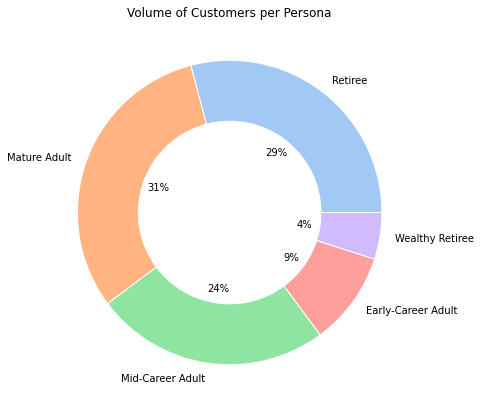

In [108]:
plt.figure(figsize=(7,7))
pie_data = [persona1_count, persona2_count, persona3_count, persona4_count, persona5_count]
pie_labels = ['Retiree', 'Mature Adult', 'Mid-Career Adult', 'Early-Career Adult', 'Wealthy Retiree']
colors = sns.color_palette('pastel')[0:5]
plt.pie(pie_data, labels=pie_labels ,colors=colors,autopct='%1.1i%%', pctdistance=0.5, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Volume of Customers per Persona')

Text(0.5, 1.0, 'Biggest spenders per Persona')

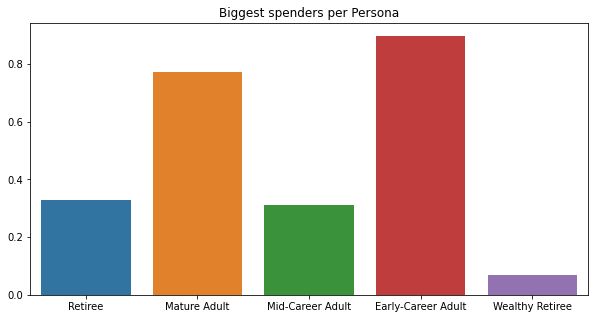

In [109]:
persona_spending_score = []
for x in range(0,5):
  persona_spending_score.append(df1_copy[df1_copy['agg_labels'] == x]['SpendingScore'].mean())

plt.figure(figsize=(10,5))
sns.barplot(x=pie_labels, y=persona_spending_score)
plt.title('Biggest spenders per Persona')

In [110]:
spending_contribution_data = []
for x in range(0,5):
  persona_count = len(df1_copy[df1_copy['agg_labels'] == x])
  persona_spending_score = df1_copy[df1_copy['agg_labels'] == x]['SpendingScore'].mean()
  spending_contribution_data.append(persona_count*persona_spending_score)
spending_contribution_data

[48.33366774454537,
 121.12838383856376,
 39.05069239946992,
 44.844581984401884,
 1.709452482844364]

In [111]:
#spending_contribution_persona1 = persona1_count*df1_copy[df1_copy['agg_labels'] == 0]['SpendingScore'].mean()
#spending_contribution_persona2 = persona2_count*df1_copy[df1_copy['agg_labels'] == 1]['SpendingScore'].mean()
#spending_contribution_persona3 = persona3_count*df1_copy[df1_copy['agg_labels'] == 2]['SpendingScore'].mean()
#spending_contribution_persona4 = persona4_count*df1_copy[df1_copy['agg_labels'] == 3]['SpendingScore'].mean()
#spending_contribution_persona5 = persona5_count*df1_copy[df1_copy['agg_labels'] == 4]['SpendingScore'].mean()
#spending_contribution_data = [spending_contribution_persona1, spending_contribution_persona2, spending_contribution_persona3, spending_contribution_persona4, spending_contribution_persona5]

Text(0.5, 1.0, 'Gross Spending Contribution per Persona')

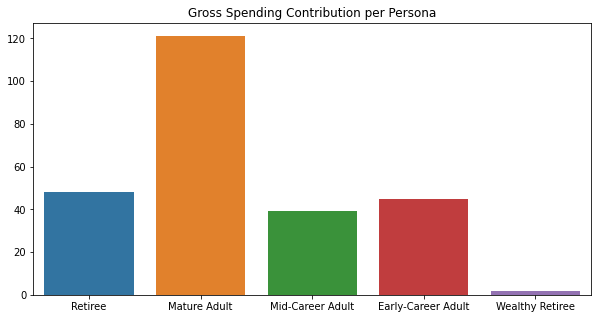

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(x=pie_labels, y=spending_contribution_data)
plt.title('Gross Spending Contribution per Persona')

Text(0.5, 1.0, 'Spending Contribution per Persona')

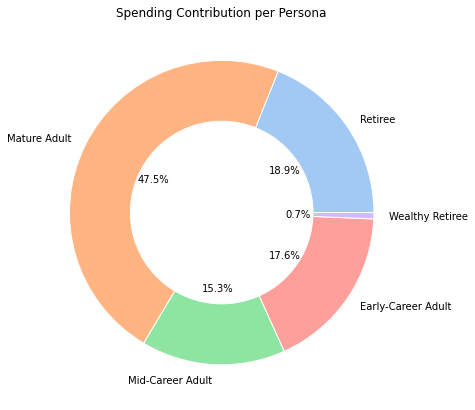

In [113]:
plt.figure(figsize=(7,7))
pie_labels = ['Retiree', 'Mature Adult', 'Mid-Career Adult', 'Early-Career Adult', 'Wealthy Retiree']
colors = sns.color_palette('pastel')[0:5]
plt.pie(spending_contribution_data, labels=pie_labels ,colors=colors,autopct='%1.1F%%', pctdistance=0.5, wedgeprops=dict(width=0.4, edgecolor='w'))
plt.title('Spending Contribution per Persona')

#### Conclusions

Out of the Five personas we come up with via the agglomerative clustering model, our biggest spenders are our Early-Career Adults, followed by our Mature Adults. However, since Early-Adults only represent 9% of our total customers they are not the biggest source of our revenue. Early-Adults currently contribute to 17.6% of our revenue.

The biggest contributors to our revenue are by far the Mature Adults who contribute 47.5% to our bottom line. Mature Adults also happen to be our biggest segment of customers in volume, so it's good to know that they are contributing the most to store revenue. 

Wealthy Retiree's happen to be both the smallest segment and the smallest contributors to our revenue. They contribute a negligable 0.7% to our revenue while making up 4% of our total customers. Since they are retired, have money, and probably have done much of their spending on jewellery in days past, they likely do not want to spend as much on material goods such as jewellery.

After much analysis on the data and the personas, our recommendation to Uncle Steve is that we should focus on keeping our customers from the Mature Adults persona happy, while trying to increase the amount of Early Career Adults that come to our store since they are by far the most profitable. 



# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

The rule {Milk} -> {Bananas} would have high support because milk has very high ubiquity in Canadian households and Banana's are also bought by many households in Canada. Also both items have somewhat similar perishability rates. Milk lasts anywhere about 7 days and bananas also last roughly 5-7 days. Thus there is a higher probability that both items will be purchased within one itemset due to how quickly they must be consumed. 

This association rule will likely have high support due to the popularity and high usage of both items. It would also have high confidence because the items often have to be purchased in similar time windows. However, there is unlikely to be an interesting relationship between the two items due since they are likely bought together due to their perishability windows. Hence, it is unlikely that there would be an interesting relationship here.



## 2.2: A rule that might have reasonably high support but low confidence.

The rule {Bread} -> {Canned Tuna} is a rule that may have reasonably high support, but low confidence. The reasoning behind this is that bread is a very popular item and can be bought in high frequency with many different items. Tuna, is also a very popular fish that is purchased quite often. Tuna and bread even go together since tuna is a common ingredient used for tuna sandwiches. 

Despite how often you may find these items together within an itemset, bread has so many applications that this rule would still likely have low confidence. In terms of sandwiches, there are tons of ingredients that go with bread besides tuna. Furthermore, bread is used in many applications outside of sandwiches, so a significant amount of milk purchases will still be made without tuna.

Despite the fact that tuna and bread can go together quite well, it is unlikely that there is an interesting relationship that can be found here. 

## 2.3: A rule that might have low support and low confidence.

The {anchovies} -> {Olive oil} woul likely have low support and low confidence. These items together are seldomly bought. Many people use olive oil for a plethora of different cooking uses where anchovies is rarely one of them. Anchovies are not popularly consumed items, so most transactions will rarely hold them. Coupled by the fact that they also have little to no real association with olive oil in terms of preparation, this association rule is unlikely to have an interesting relationship. Such association rules ought to be avoided in many cases.

## 2.4: A rule that might have low support and high confidence.

The rule {Gift Card} -> {Greeting Card} would have low support because customers primarily come to Uncle Steve's Fine Foods for grocerys and buying Gift cards and greeting cards is probably not the primary reason why people will make a trip to Uncle Steve's Fine Foods. It is more of a convenience item than it is a primary item customers look for. Hence, the average customer will not be looking for Gift Cards or Greeting Cards, so the support would likely be low. 

Regarding the confidence level for {Gift Card} -> {Greeting Card}, it is very likely to be high. The reasoning behind this is that Gift Cards are often sold without any packaging befitting the presentation of a gift. Because gift cards lack in the gift presentation department,logically they must be coupled with another item that improves the presentation asthetic of the card. Hence, a greeting card would be the most logical, accessible, and inexpensive choice to solve this problem for the customer. 

There are some instances where gift cards are also purchased as prize cards, which would negate the gift/presentation dilemna of buying a gift card, but it is more likely that those customers would prefer a non-foods store to make such a purchase than not. However, there are never any absolutes and it is definitely within the realm of reason that some Fine Foods' customers may want to purchase a gift card as a prize card at Uncle Steve's Fine Foods. 

To increase profitability, we could explore the option of increasing the price of greeting cards since they are usually inexpensive in comparison to Gift Cards, and are likely to be bought by Gift Card Holders. We would have to be sensitive to how many greeting cards purchasers buy without gift cards since it could potentially hurt this segment of customers if the price is increased by too great of an amount.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [76]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [78]:
X_train.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27


In [79]:
#Creating Cardinality Report for Features
cardi=[]
for x in range(0,16):
  cardi.append(X_train.iloc[:,x].nunique())

print('Cardinality Report')
pd.DataFrame(data=cardi, index=X_train.columns).T


Cardinality Report


,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
0,4800,2,2,568,907,3,7,10,4800,4799,1641,2,6,20,8,3570


In [80]:
DateOfBirth = X_train['DateOfBirth']
X_train = X_train.drop(['UserID','Street','LicensePlate'], axis=1)


In [81]:
#Created a function that extracts all the categorical column names from the dataset
cat_cols = []
def get_cat(mydata):
  i = 0
  while i < len(mydata.columns) :
     if mydata.iloc[:,i].dtype == 'O':
       cat_cols.append(mydata.columns[i])
       i +=1
     else: i +=1
  return cat_cols

get_cat(X_train)

['Sex', 'FirstName', 'LastName', 'City', 'Purpose', 'DateOfBirth']

In [82]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train[cat_cols] = enc.fit_transform(X_train[cat_cols])
X_train.head()


,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,1.0,0,259.0,75.0,2,0,2,3329,0,12,12.0,2.0,1071.0
5628,0.0,0,290.0,436.0,0,2,2,2996,0,36,3.0,2.0,213.0
1756,0.0,0,1.0,250.0,2,0,3,2470,0,24,2.0,3.0,2110.0
2346,0.0,0,261.0,436.0,2,1,2,3745,0,30,7.0,6.0,2501.0
2996,1.0,0,559.0,756.0,0,1,3,3549,0,36,13.0,7.0,2401.0


Binary F1 Score: 0.6329403989474887
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3976
           1       0.69      0.59      0.63       824

    accuracy                           0.88      4800
   macro avg       0.80      0.77      0.78      4800
weighted avg       0.88      0.88      0.88      4800

[[3758  218]
 [ 340  484]]


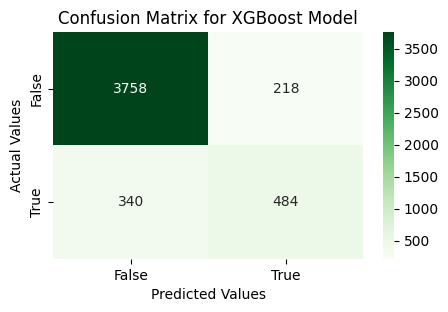

In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

XGB_clf = XGBClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
print('Binary F1 Score:', cross_val_score(XGB_clf, X_train, y_train, cv=5, scoring='f1').mean())
y_pred = cross_val_predict(XGB_clf, X_train, y_train, cv=5)
XGB_clf.fit(X_train, y_train)

# Classification Report
print(classification_report(y_train, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["False", "True"], yticklabels = ["False", "True"],  cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for XGBoost Model")
plt.show()




In [84]:
XGB_clf.feature_importances_
featureimp = pd.DataFrame({'Feature': X_train.columns, 'Importance': XGB_clf.feature_importances_})
top10features = featureimp.sort_values(['Importance'], ascending=False).iloc[:]


print(top10features)

              Feature  Importance
7              Amount    0.316089
12        DateOfBirth    0.315018
8             Married    0.056033
9            Duration    0.044666
4          NumberPets    0.043233
11            Purpose    0.042561
1     PreviousDefault    0.042236
6   ResidenceDuration    0.034799
3            LastName    0.033639
10               City    0.026442
2           FirstName    0.023975
5    PreviousAccounts    0.021307
0                 Sex    0.000000


## 3.2: Feature engineering

In [85]:
DateOfBirth_encoded= X_train['DateOfBirth']
X_train['DateOfBirth'] = DateOfBirth

In [86]:
def date_split(yourdata):
    df = yourdata
    date_recorded = pd.DataFrame(pd.to_datetime(df['DateOfBirth']))
    Date_time = pd.DataFrame(columns=['Birth_Year'])
    Date_time['Birth_Year'] = date_recorded['DateOfBirth'].dt.year
    Date_time['Birth_Month'] = date_recorded['DateOfBirth'].dt.month
    Date_time['Birth_Day'] = date_recorded['DateOfBirth'].dt.day
    df['Birth_Year'], df['Birth_Month'], df['Birth_Day'] = Date_time['Birth_Year'], Date_time['Birth_Month'], Date_time['Birth_Day']
    #df.drop('date_recorded',axis=1, inplace = True)
    return df

In [87]:
X_train = date_split(X_train)
X_train['DateOfBirth'] = DateOfBirth_encoded

In [88]:
X_train['Min_Payment_Per_Month'] = X_train['Amount']/X_train['Duration']

In [89]:
#X_train['Single_PetParent'] = np.nan
#X_train.head()
#X_train.mask(X_train[(X_train['Married'] == 0) & (X_train['NumberPets'] > 0),1])

In [90]:
columns = X_train.columns
X_train.head()

,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth,Birth_Year,Birth_Month,Birth_Day,Min_Payment_Per_Month
3897,1.0,0,259.0,75.0,2,0,2,3329,0,12,12.0,2.0,1071.0,1970,4,22,277.416667
5628,0.0,0,290.0,436.0,0,2,2,2996,0,36,3.0,2.0,213.0,1964,6,19,83.222222
1756,0.0,0,1.0,250.0,2,0,3,2470,0,24,2.0,3.0,2110.0,1975,2,17,102.916667
2346,0.0,0,261.0,436.0,2,1,2,3745,0,30,7.0,6.0,2501.0,1977,2,16,124.833333
2996,1.0,0,559.0,756.0,0,1,3,3549,0,36,13.0,7.0,2401.0,1976,7,27,98.583333


In [91]:
#Import Standard Scalaer from SKlearn preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#define the scaler
scaler = StandardScaler().fit(X_train)

#Scale the train set
X_train = scaler.transform(X_train)


X_train = pd.DataFrame(data=X_train, columns=columns)
X_train.head()

,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth,Birth_Year,Birth_Month,Birth_Day,Min_Payment_Per_Month
0,1.511017,-0.143615,-0.157106,-1.570292,1.198870,-0.995216,0.006558,-0.627068,-1.010893,-1.307621,0.500196,-1.159846,-0.724063,-0.565127,-0.743461,0.703516,0.594943
1,-0.661806,-0.143615,0.032974,-0.163659,-1.249886,0.984903,0.006558,-1.410231,-1.010893,1.248250,-1.142658,-1.159846,-1.603461,-1.576039,-0.158730,0.363036,-0.792904
2,-0.661806,-0.143615,-1.739067,-0.888406,1.198870,-0.995216,0.722001,-2.647298,-1.010893,-0.029685,-1.325197,-0.588317,0.340849,0.277299,-1.328191,0.136050,-0.652154
3,-0.661806,-0.143615,-0.144843,-0.163659,1.198870,-0.005157,0.006558,0.351297,-1.010893,0.609282,-0.412501,1.126268,0.741600,0.614269,-1.328191,0.022557,-0.495522
4,1.511017,-0.143615,1.682383,1.083218,-1.249886,-0.005157,0.722001,-0.109664,-1.010893,1.248250,0.682735,1.697797,0.639106,0.445784,0.133635,1.270982,-0.683123


Binary F1 Score: 0.6462733504270994
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3976
           1       0.69      0.61      0.65       824

    accuracy                           0.89      4800
   macro avg       0.81      0.78      0.79      4800
weighted avg       0.88      0.89      0.88      4800

[[3757  219]
 [ 325  499]]


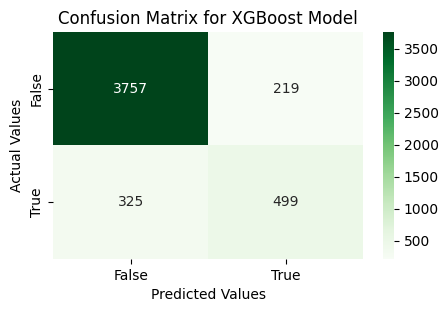

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

XGB_clf = XGBClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
print('Binary F1 Score:',cross_val_score(XGB_clf, X_train, y_train, cv=5, scoring='f1').mean())
y_pred = cross_val_predict(XGB_clf, X_train, y_train, cv=5)
XGB_clf.fit(X_train, y_train)

# Classification Report
print(classification_report(y_train, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["False", "True"], yticklabels = ["False", "True"],  cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for XGBoost Model")
plt.show()


In [93]:
XGB_clf.feature_importances_
featureimp = pd.DataFrame({'Feature': X_train.columns, 'Importance': XGB_clf.feature_importances_})
top10features = featureimp.sort_values(['Importance'], ascending=False).iloc[:]


print(top10features)

                  Feature  Importance
7                  Amount    0.299637
12            DateOfBirth    0.298566
8                 Married    0.049829
6       ResidenceDuration    0.043745
1         PreviousDefault    0.041634
14            Birth_Month    0.041553
15              Birth_Day    0.038243
16  Min_Payment_Per_Month    0.032880
11                Purpose    0.032755
10                   City    0.028906
2               FirstName    0.028780
3                LastName    0.026230
4              NumberPets    0.019978
5        PreviousAccounts    0.009695
9                Duration    0.007568
13             Birth_Year    0.000000
0                     Sex    0.000000


## 3.3: Feature selection

In [94]:
from sklearn.feature_selection import RFE
selector = RFE(XGBClassifier(n_estimators=100, max_depth=3, class_weight='balanced'),n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selector.support_


array([False,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False])

In [95]:
selector.ranking_

array([13,  1,  8,  9,  2, 10,  4,  1,  1, 11,  6,  1,  1, 12,  5,  3,  7])

In [96]:
pd.DataFrame(data=selector.ranking_,index=columns).T

,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth,Birth_Year,Birth_Month,Birth_Day,Min_Payment_Per_Month
0,13,1,8,9,2,10,4,1,1,11,6,1,1,12,5,3,7


Binary F1 Score: 0.6342901338763408
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3976
           1       0.69      0.59      0.64       824

    accuracy                           0.88      4800
   macro avg       0.80      0.77      0.78      4800
weighted avg       0.88      0.88      0.88      4800

[[3752  224]
 [ 336  488]]


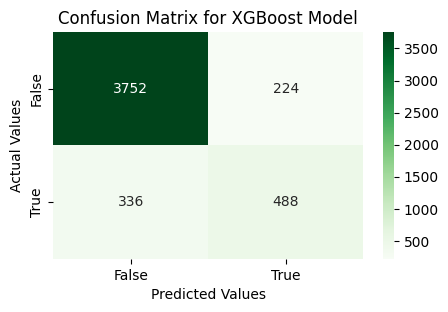

In [97]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

XGB_clf = XGBClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
print('Binary F1 Score:',cross_val_score(XGB_clf, X_train[['PreviousDefault', 'Amount','Married','Purpose','DateOfBirth']], y_train, cv=5, scoring='f1').mean())
y_pred = cross_val_predict(XGB_clf, X_train[['PreviousDefault', 'Amount','Married','Purpose','DateOfBirth']], y_train, cv=5)
XGB_clf.fit(X_train[['PreviousDefault', 'Amount','Married','Purpose','DateOfBirth']], y_train)

# Classification Report
print(classification_report(y_train, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["False", "True"], yticklabels = ["False", "True"],  cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for XGBoost Model")
plt.show()


In [98]:
XGB_clf.feature_importances_
featureimp = pd.DataFrame({'Feature': X_train[['PreviousDefault', 'Amount','Married','Purpose','DateOfBirth']], 'Importance': XGB_clf.feature_importances_})
top10features = featureimp.sort_values(['Importance'], ascending=False).iloc[:]


print(top10features)

                                         Feature  Importance
4              (D, a, t, e, O, f, B, i, r, t, h)    0.415992
1                             (A, m, o, u, n, t)    0.395895
2                          (M, a, r, r, i, e, d)    0.083195
3                          (P, u, r, p, o, s, e)    0.052855
0  (P, r, e, v, i, o, u, s, D, e, f, a, u, l, t)    0.052064


## 3.4: Hyperparameter tuning (WARNING, This Section will take 3-4 hours minimum, You can skip this step)

In [64]:
import timeit
import time
from sklearn.model_selection import GridSearchCV

param_grid = { 
              "n_estimators" : [10, 20, 40,60,80,100],
              "max_depth" : [2,3,6,8],
               'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.3],
              'class_weight': ['balanced'],
               "min_child_weight" : [ 1, 3, 5, 7 ],
               "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 1 ]
              }

              
start = time.time()
start2 = timeit.default_timer()


grid = GridSearchCV(estimator=XGB_clf, param_grid = param_grid, scoring='f1', cv=5,)
grid = grid.fit(X_train, y_train.values.ravel())

duration = time.time() - start
print(grid.best_score_)
print(grid.best_params_)
print(grid.cv_results_)
print("Total duration: {}".format(duration))

stop = timeit.default_timer()
print('Time: ', stop - start2)

KeyboardInterrupt: ignored

0.6508578958717256
{'class_weight': 'balanced', 'colsample_bytree': 1, 'gamma': 0.4, 'learning_rate': 0.15, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100}

Binary F1 Score: 0.6508578958717256
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3976
           1       0.70      0.61      0.65       824

    accuracy                           0.89      4800
   macro avg       0.81      0.78      0.79      4800
weighted avg       0.88      0.89      0.89      4800

[[3765  211]
 [ 324  500]]


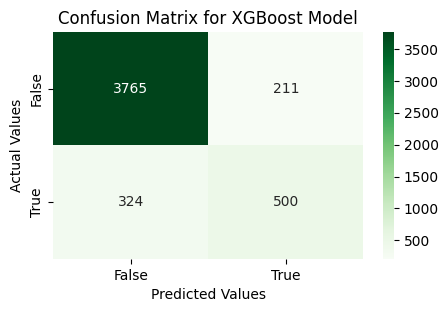

In [99]:
#Put Best Params into Model to verify Performance
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

XGB_clf = XGBClassifier(n_estimators=100, max_depth=2, colsample_bytree=1, gamma=0.4, learning_rate=0.15, min_child_weight=3, class_weight='balanced')
print('Binary F1 Score:',cross_val_score(XGB_clf, X_train, y_train, cv=5, scoring='f1').mean())
y_pred = cross_val_predict(XGB_clf, X_train, y_train, cv=5)
XGB_clf.fit(X_train, y_train)

# Classification Report
print(classification_report(y_train, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["False", "True"], yticklabels = ["False", "True"],  cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for XGBoost Model")
plt.show()



## 3.5: Performance estimation

In [100]:
DateOfBirth = X_test['DateOfBirth']
X_test = X_test.drop(['UserID','Street','LicensePlate'], axis=1)

In [101]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_test[cat_cols] = enc.fit_transform(X_test[cat_cols])
X_test.head()

,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
1782,0.0,0,348.0,97.0,1,1,3,3773,0,36,13.0,3.0,375.0
3917,0.0,0,347.0,56.0,0,0,3,3412,0,24,8.0,6.0,53.0
221,0.0,0,172.0,252.0,2,2,0,4146,0,24,19.0,3.0,386.0
2135,1.0,0,279.0,421.0,2,1,1,3608,1,30,1.0,6.0,48.0
5224,0.0,0,260.0,253.0,2,1,1,2947,1,24,13.0,3.0,869.0


In [102]:
DateOfBirth_encoded= X_test['DateOfBirth']
X_test['DateOfBirth'] = DateOfBirth

In [103]:
X_test = date_split(X_test)
X_test['DateOfBirth'] = DateOfBirth_encoded

In [104]:
X_test['Min_Payment_Per_Month'] = X_test['Amount']/X_test['Duration']

In [105]:
#Import Standard Scalaer from SKlearn preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#define the scaler
scaler = StandardScaler().fit(X_test)

#Scale the test set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=columns)
X_test.head()

,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth,Birth_Year,Birth_Month,Birth_Day,Min_Payment_Per_Month
0,-0.662457,-0.126839,1.400112,-1.163750,-0.022376,-0.016559,0.746428,0.458866,-1.008368,1.290848,0.707299,-0.568221,-0.583254,-0.517748,0.972410,-0.147483,-0.670093
1,-0.662457,-0.126839,1.391045,-1.416161,-1.242859,-1.010094,0.746428,-0.373567,-1.008368,0.038104,-0.210675,1.116783,-1.578918,-1.636050,0.683790,-1.729679,-0.412874
2,-0.662457,-0.126839,-0.195750,-0.209512,1.198108,0.976977,-1.447156,1.318970,-1.008368,0.038104,1.808867,-0.568221,-0.549241,-0.517748,1.549651,0.304573,-0.202318
3,1.509533,-0.126839,0.774462,0.830916,1.198108,-0.016559,-0.715961,0.078391,0.991701,0.664476,-1.495838,1.116783,-1.594378,-1.636050,0.395169,-1.277623,-0.563649
4,-0.662457,-0.126839,0.602181,-0.203355,1.198108,-0.016559,-0.715961,-1.445815,0.991701,0.038104,0.707299,-0.568221,0.944254,0.760313,-0.470692,-0.599539,-0.546265


Binary F1 Score: 0.6508578958717256
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3976
           1       0.70      0.61      0.65       824

    accuracy                           0.89      4800
   macro avg       0.81      0.78      0.79      4800
weighted avg       0.88      0.89      0.89      4800

[[3765  211]
 [ 324  500]]


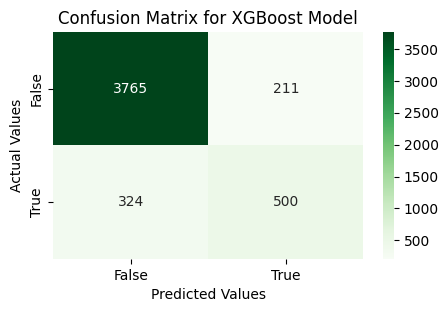

In [106]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

XGB_clf = XGBClassifier(n_estimators=100, max_depth=2, colsample_bytree=1, gamma=0.4, learning_rate=0.15, min_child_weight=3, class_weight='balanced')
print('Binary F1 Score:',cross_val_score(XGB_clf, X_train, y_train, cv=5, scoring='f1').mean())
y_pred = cross_val_predict(XGB_clf, X_train, y_train, cv=5)
XGB_clf.fit(X_train, y_train)

# Classification Report
print(classification_report(y_train, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["False", "True"], yticklabels = ["False", "True"],  cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for XGBoost Model")
plt.show()


In [107]:
prediction = XGB_clf.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

Final Answer for Performance
Binary F1 Score: 0.6818181818181819
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       991
           1       0.72      0.65      0.68       209

    accuracy                           0.90      1200
   macro avg       0.82      0.80      0.81      1200
weighted avg       0.89      0.90      0.89      1200

[[939  52]
 [ 74 135]]


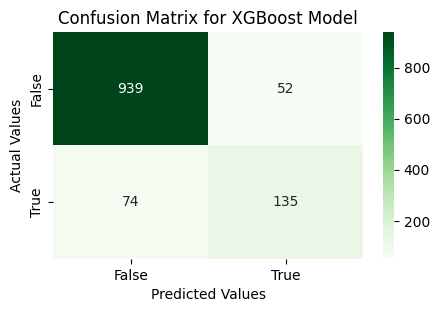

In [109]:
#F1 Score
print('Final Answer for Performance')
print('Binary F1 Score:', f1_score(y_test, prediction, average='binary'))


# Classification Report
print(classification_report(y_test, prediction))
# Confusion Matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["False", "True"], yticklabels = ["False", "True"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for XGBoost Model")
plt.show()


# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



#### Answer
Uncle Steve is correct in wanting to choose the model using Random Forest. Choosing the model with Random Forest over RNN will save Uncle Steve an additional $137,500 dollars. 

It is true that the RNN has a better recall than the Random Forest, 0.8828125 compared to Random Forest's 0.78515625 to be exact. However, recall does not capture the entire story in this situation. In this situation there are two main objectives. 
1. Minimize the amount of False Positives, which are the No Fail predictions from the model that actually will Fail.
2. Minimizing the amount of False Negatives, which are the Fail Predictions from the model that actually will not Fail.

An aggregate of these two objectives, with costs of course being factored in,  will illustrate to us what model provides the most savings. The Recall metric best represents objective 1 while the Precision metric best represents objective 2. Combining these two metrics together will give us what is called an F1 Macro score, which will be the best comparative representation of which model will likely save the most money. We will break this down a little more so that it can be understood further.

With some simple match that is derived from the confusion matrices above, we can calculate that the Random Forrest recall is 0.78515625(201/(201+55) and the precision is 0.800796813(201/201+50). These values create the aggregate metric called F1 macro score which is computed to be 0.792976531 ((0.78515625 + 0.800796813)/2). Using the same logic above, we can calculate that the RNN recall is 0.8828125 (226/(226+30) and the precision is 0.158485273(226/(226+1200). These values create the aggregate metric  F1 macro score which is computed to be 0.520648887 ((0.8828125+0.158485273)/2).

Based on the very rudimentary math above, we can see that the model that used Random Forest has a far superior F1 Macro score of 79 percent while RNN has an inferior F1 Macro of 52 percent. Thus, based on our two objectives, Random Forest is clearly the better model. Of course, costs usually have to be factored in since differing levels of costs can still. Once the cost matrices is produced in tandem with the confusion matricies,  the random forest model will produce a cost that is equal to $1,627,500 dollars, while the RNN produces a cost of $1,765,00 dollars. As stated initially, choosing the random forrest model leads to additional savings of $137,500 dollars which is roughly a 7.8 percent increase in savings from chosing the Random Forest instead of RNN.